In [248]:
#import dependencies

%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pymysql
pymysql.install_as_MySQLdb() 

In [249]:
import numpy as np
import pandas as pd

In [250]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [251]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [252]:
#create engine to establish connection with the database

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [253]:
# inspect the tables in the database before establishing connection

inspector =inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [254]:
#check for the column names and their datatypes for a particular table 'measurement'

column_check = inspector.get_columns('measurement')
for check in column_check:
    print(check['name'],check['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [255]:
#check for the column names and their datatypes for a particular table 'station'

column_check = inspector.get_columns('station')
for check in column_check:
    print(check['name'],check['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [256]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [257]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [258]:
#check for the data in the table 'measurement'

engine.execute("select * from measurement limit 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [259]:
#check for the data in the table 'station'

engine.execute("select * from station limit 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [260]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [261]:
# Create our session (link/connection) from Python to the DB

session = Session(bind=engine)

# Exploratory Climate Analysis

In [262]:
#check for the single row of data from the measurement table

M_data = session.query(Measurement).first()
M_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1dd4a338d0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [263]:
#check for the single row of data from the station table

S_data = session.query(Station).first()
S_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1dd5e79748>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

# Precipitation Analysis

In [264]:
# Design a query to retrieve the last 12 months of precipitation data

# Calculate the date 1 year ago from today

year_ago_ppt = dt.date.today() - dt.timedelta(days =365)
year_ago_ppt


datetime.date(2017, 9, 28)

In [265]:
# First, need to find the last date for which the precipitation happened and assign it to a variable.

last_date_of_ppt = session.query(Measurement.date).group_by(Measurement.date==year_ago_ppt).order_by(Measurement.date.desc()).first()
print(last_date_of_ppt)


('2017-08-23',)


In [266]:
# Perform a query to retrieve the data and precipitation scores

ppt = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.between ('2016-08-23','2017-08-23')).order_by(Measurement.date).all()
ppt


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [267]:
#Load the query results into a Pandas DataFrame and set the index to the date column.

ppt_df = pd.DataFrame(ppt)
ppt_df.head()

# Sort the DataFrame values by date.

ppt_date = ppt_df.set_index('date')
ppt_date.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


<IPython.core.display.Javascript object>


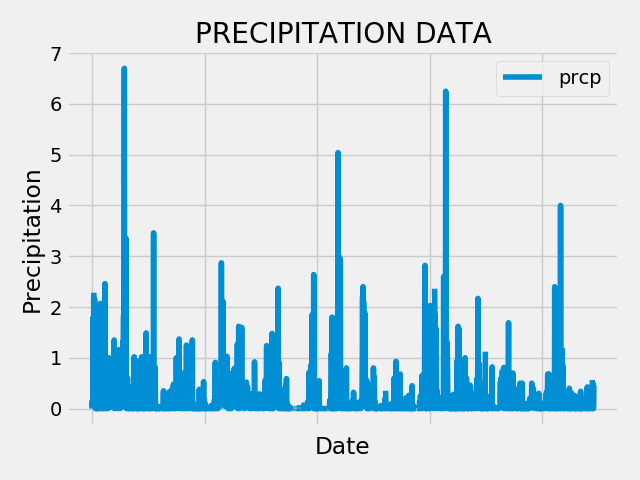

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

In [268]:
# Plot the results using the DataFrame plot method
# Use Pandas Plotting with Matplotlib to plot the data

ppt_date.plot(grid=True,title="PRECIPITATION DATA")
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# Rotate the xticks for the dates
plt.xticks(rotation =45)

In [183]:
# just checking how the DF looks for both measurement and station tables.

M_check1 = session.query(Measurement).statement
M_df = pd.read_sql(M_check1,session.bind)
M_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [269]:
S_check2 = session.query(Station).statement
S_df = pd.read_sql(S_check2,session.bind)
S_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [270]:
#Use Pandas to print the summary statistics for the precipitation data

ppt_date.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [271]:
# How many stations are available in this dataset?
#Design a query to calculate the total number of stations.

station_count = session.query(Station.station).count()
print(f"There are a total of {station_count} stations in this dataset")


There are a total of 9 stations in this dataset


In [272]:
# # Finding highest temperature observation count using Raw SQL statements passed into a query

In [273]:
# What are the most active stations?
# Design a query to find the most active stations.
# List the stations and the counts in descending order.

query = "select Measurement.station, count(Measurement.tobs) as 'Temp observations'\
        from Measurement\
        group by Measurement.station\
        order by count(Measurement.tobs) desc"
active_stations = pd.read_sql(query,engine)
active_stations
      

,station,Temp observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [274]:
# Choose the station with the highest number of temperature observations.

highest_temp_station_no = active_stations.iloc[0,0]

highest_temp_obs = active_stations.iloc[0,1]
print(f"The station with the highest number of temperature observations is {highest_temp_station_no} with total observations of {highest_temp_obs}." )


The station with the highest number of temperature observations is USC00519281 with total observations of 2772.


In [275]:
# # Finding highest temperature observation count using SQL alchemy queries.

In [276]:
# What are the most active stations?
# Design a query to find the most active stations.
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active_stations

# active_stations_df = pd.DataFrame(data=station)
# active_stations_df


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [277]:
# Choose the station with the highest number of temperature observations.

highest_temp_station_no = active_stations[0][0]
highest_temp_obs = active_stations[0][1]
print(f"The station with the highest number of temperature observations is {highest_temp_station_no} with total observations of {highest_temp_obs}.")

The station with the highest number of temperature observations is USC00519281 with total observations of 2772.


In [278]:
# Using func.min, calculate the lowest temperature recorded at the most active station.

# lowest_temp_recorded = session.query(func.min(Measurement.tobs)).order_by(Measurement.station).first()
# lowest_temp_recorded

# Using the station id from the previous query, calculate the lowest temperature recorded at the most active station.
lowest_temp_recorded = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').group_by(Measurement.station).all()
lowest_temp_recorded


[(54.0)]

In [279]:
#calculate the average temperature recorded at the most active station

# avg_temp_recorded = session.query(func.avg(Measurement.tobs)).order_by(Measurement.station).first()
# avg_temp_recorded

# Using the station id from the previous query, calculate the average temperature recorded at the most active station.
avg_temp_recorded = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').group_by(Measurement.station).all()
avg_temp_recorded

[(71.66378066378067)]

In [280]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_date_of_ppt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_of_ppt


('2017-08-23')

In [281]:
year_ago_ppt = dt.date(2017,8,23) - dt.timedelta(days =365)
print(year_ago_ppt)

query = session.query(Measurement.date, Measurement.tobs ).\
filter(Measurement.date>=year_ago_ppt).\
filter(Measurement.station=="USC00519281").\
order_by(Measurement.date).statement

active_station = pd.read_sql_query(query, session.bind)
active_station_date = active_station.set_index('date')
active_station_date.head(10)

2016-08-23


,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0


<IPython.core.display.Javascript object>


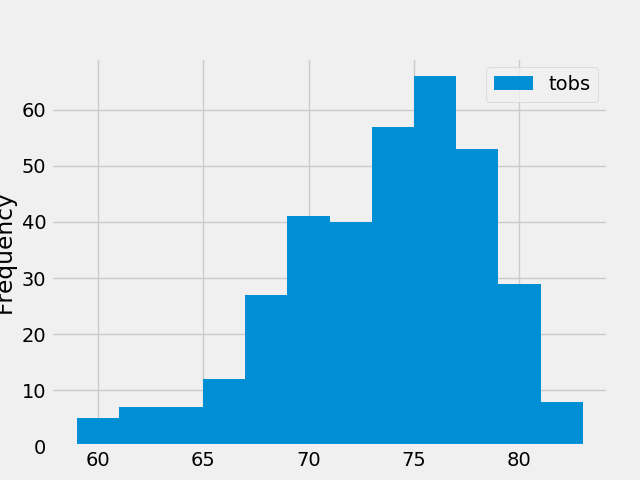

In [282]:
active_station_date.plot(kind='hist',bins=12)

# Temperature Analysis

In [283]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [284]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.
# Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching 
# dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").
start_date = dt.date(2018,7,11)
end_date = dt.date(2018,7,21)
previous_year = dt.timedelta(days=365)
diff_dates_temp = (calc_temps((start_date-previous_year), (end_date-previous_year)))
diff_dates_temp


[(72.0, 78.38888888888889, 83.0)]

<IPython.core.display.Javascript object>


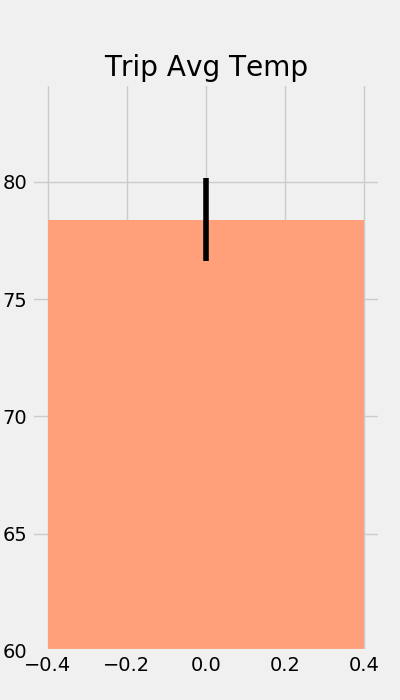

(60, 84.17499999999998)

In [298]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temp_min = diff_dates_temp[0][1] - diff_dates_temp[0][0]
temp_max = diff_dates_temp[0][2] - diff_dates_temp[0][1]

plt.figure(figsize=(4,7))
plt.bar(0, diff_dates_temp[0][1], yerr=[temp_max-temp_min], color='lightsalmon')
plt.title('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.xlabel('')
plt.ylim(60)

# Recommended Analysis

In [92]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [93]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [94]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [95]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [34]:
# Plot the daily normals as an area plot with `stacked=False`
